In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Visualization
def draw_vector(v0, v1, color='k', ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def plot(X, y, pca=None, lda=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)

    if pca is not None:
        # draw first component
        length, vector = pca.explained_variance_[0], pca.components_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(pca.mean_, pca.mean_ + v)

    if lda is not None:
        # draw first component
        length, vector = lda.intercept_[0], lda.coef_[0]
        v = vector / np.sqrt(vector**2)
        draw_vector(lda.xbar_, lda.xbar_ + v, color='r')

    plt.axis('equal')
    plt.show()

Training data:


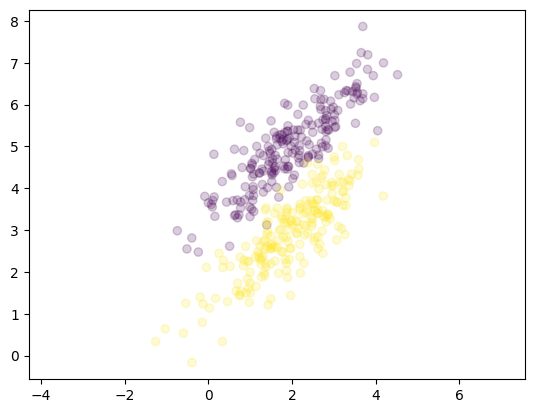

In [3]:
# create synthetic data
mean1 = np.asarray([2.0, 5.0])
mean2 = np.asarray([2.0, 3.0])
cov = np.asarray([[1.0, 0.85], [0.85, 1.0]])

# training set of 2D points with two classes - used to create a model
training_size = 200
X1 = np.random.multivariate_normal(mean1, cov, training_size)
X2 = np.random.multivariate_normal(mean2, cov, training_size)
X_train = np.concatenate((X1, X2), axis=0)
y_train = [0]*training_size + [1]*training_size

print('Training data:')
plot(X_train, y_train)

# PCA vs. LDA

PCA

[1.93776429 3.94046928] 

[[-0.49331729 -0.86984944]
 [ 0.86984944 -0.49331729]] 

[0.82322679 0.17677321] 


LDA

[1.93776429 3.94046928] 

[[ 6.07276396 -7.42284445]] 

[1.] 



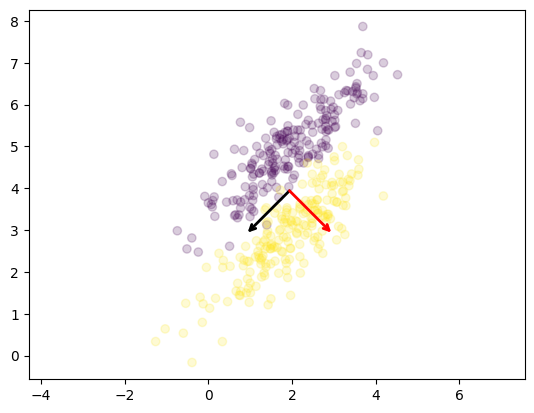

In [4]:
# PCA
pca = PCA(n_components=2)
pca.fit(X_train)

print('PCA\n')

# mean point
print(pca.mean_, '\n')

# principal components - "main data directions"
print(pca.components_, '\n')

# percentage of variation per component
print(pca.explained_variance_ratio_, '\n')

# LDA
lda = LDA()
lda.fit(X_train, y_train)

print('\nLDA\n')

# mean point
print(lda.xbar_, '\n')

# principal components - "main data directions"
print(lda.coef_, '\n')

# percentage of variation per component
print(lda.explained_variance_ratio_, '\n')

plot(X_train, y_train, pca, lda)

# LDA for dimensionality reduction / visualization

In [5]:
# load MNIST dataset using Keras
(X_mnist, y_mnist), _ = mnist.load_data()

print("X_train shape", X_mnist.shape)
print("y_train shape", y_mnist.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)


In [6]:
def show_images(imgs, num_rows, num_cols):
    assert len(imgs) == num_rows*num_cols

    for i in range(num_rows):
        row = None
        for j in range(num_cols):
            if row is None:
                row = imgs[i*num_cols+j]
            else:
                row = np.concatenate((row, imgs[i*num_cols+j]), axis=1)
        plt.imshow(row, cmap='gray')
        plt.axis('off')
        plt.show()

(200, 784) uint8
(200,) int64


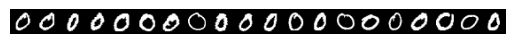

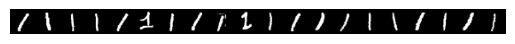

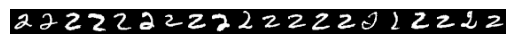

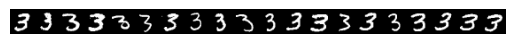

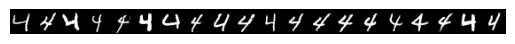

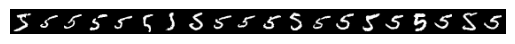

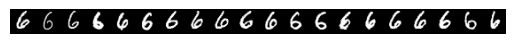

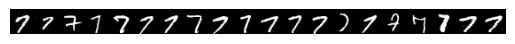

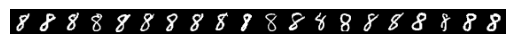

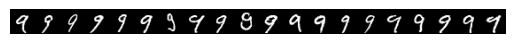

In [7]:
N_SAMPLES = 20
N_CLASSES = 10

# get the first N_SAMPLES training images per class
indices = []
y_train = []
for i in range(N_CLASSES):
    indices += list(np.where(y_mnist == i)[0][:N_SAMPLES])
    y_train += [i]*N_SAMPLES
X_train = X_mnist[indices].reshape(N_SAMPLES*N_CLASSES, -1)
y_train = np.asarray(y_train)

print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

show_images(X_train.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

In [8]:
lda = LDA(n_components=2)  # project from 784 to 2 dimensions
X_train_projected = lda.fit_transform(X_train, y_train)
print(X_train.shape)
print(X_train_projected.shape)

print(lda.explained_variance_ratio_)

(200, 784)
(200, 2)
[0.24063629 0.21731048]


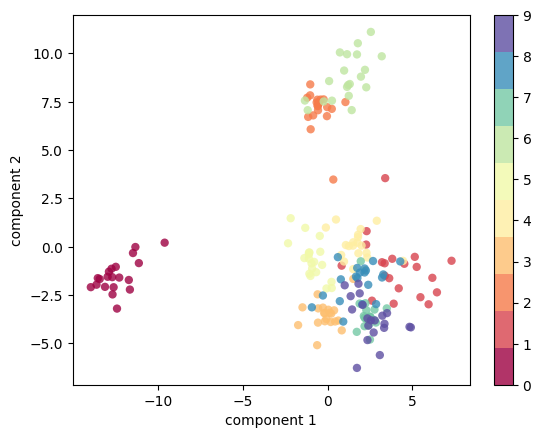

In [9]:
plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# LDA for classification

In [10]:
N_SAMPLES = 50 # get three subsets of N_SAMPLES (training, validation, test)
N_CLASSES = 10

# get the first N_SAMPLES training images per class
train_indices = []
val_indices = []
test_indices = []
y_train = []
for i in range(N_CLASSES):
    train_indices += list(np.where(y_mnist == i)[0][:N_SAMPLES])
    val_indices += list(np.where(y_mnist == i)[0][N_SAMPLES:2*N_SAMPLES])
    test_indices += list(np.where(y_mnist == i)[0][2*N_SAMPLES:3*N_SAMPLES])
    y_train += [i]*N_SAMPLES
X_train = X_mnist[train_indices].reshape(N_SAMPLES*N_CLASSES, -1)
X_val = X_mnist[val_indices].reshape(N_SAMPLES*N_CLASSES, -1)
X_test = X_mnist[test_indices].reshape(N_SAMPLES*N_CLASSES, -1)
y_train = np.asarray(y_train)
y_val = y_train.copy()
y_test = y_train.copy()

print('Training:')
show_images(X_train.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

print('Validation:')
show_images(X_val.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

print('Test:')
show_images(X_test.reshape(-1, 28, 28), N_CLASSES, N_SAMPLES)

Training:


Validation:


Test:


In [11]:
def plot_confusion(cm):
    plt.rcParams["figure.figsize"] = (5,5)
    fig, ax = plt.subplots()
    c= ax.matshow(cm, cmap='copper')
    fig.colorbar(c, ax=ax)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = ax.text(j, i, cm[i, j], ha='center', va='center', color='w', fontsize=10, weight='bold')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.show()

Class: 0 / F-score: 0.5
Class: 1 / F-score: 0.6379310344827586
Class: 2 / F-score: 0.23655913978494625
Class: 3 / F-score: 0.17073170731707318
Class: 4 / F-score: 0.28767123287671237
Class: 5 / F-score: 0.2526315789473685
Class: 6 / F-score: 0.43902439024390244
Class: 7 / F-score: 0.4528301886792452
Class: 8 / F-score: 0.268041237113402
Class: 9 / F-score: 0.3789473684210526
Average F-score: 0.36243678778664606


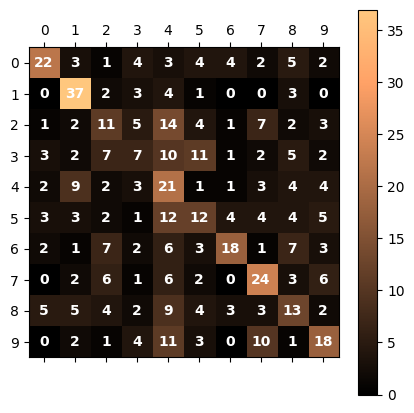

In [12]:
# n_components doesn't affect the 'predict' function
# no hyperparameters to tune for LDA, so let's report result on test set
lda = LDA().fit(X_train, y_train)
y_pred = lda.predict(X_test)

# compute F-score for each class
fscores = []
for j in range(10):
    positives = len(y_pred[np.where(y_test == j)])
    true_positives = len(y_pred[np.where((y_pred == j) & (y_test == j))])
    false_positives = len(y_pred[np.where((y_pred == j) & (y_test != j))])

    if true_positives+false_positives == 0:
        precision = 0
    else:
        precision = true_positives/(true_positives+false_positives)
    recall = true_positives/positives
        
    if precision+recall == 0:
        fscore = 0
    else:
        fscore = (2.0*precision*recall)/(precision+recall)
    fscores.append(fscore)

    print('Class: {} / F-score: {}'.format(j, fscore))

print('Average F-score:', np.mean(fscores))
cm = confusion_matrix(y_val, y_pred)
plot_confusion(cm)